In [2]:
import pandas as pd
import matplotlib.pyplot as plt 



In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
#Backup

df_backup = df.copy()

In [7]:
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
nulos_por_linha = df.isnull().sum(axis=1) 
print(nulos_por_linha)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
df = df.drop_duplicates()

In [14]:
df_teste = df.drop_duplicates('PassengerId')

In [15]:
df_teste.shape

(891, 12)

In [16]:
def visualizar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)]
    
    return duplicados

linhas_duplicados = visualizar_as_duplicadas(df)
print(linhas_duplicados)



Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [17]:
df = df.drop(columns=['SibSp', 'Parch'])

In [20]:
df_test = df.dropna(subset='Cabin')

In [21]:
df_test.shape


(204, 10)

In [22]:
df = df.reset_index(drop=True)

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.rename(columns={
    'PassengerId': 'idPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe', 
    'Name': 'Nome',
    'Sex': 'Genero',
    'Age': 'Idade',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa ',
    'Cabin': 'Cabine', 
    'Embarked': 'Embarque'     
}, inplace=True
)

In [25]:
df.columns

Index(['idPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa ', 'Cabine', 'Embarque'],
      dtype='object')

In [26]:
df.to_csv('titanic_tratado.csv', index=False)

##Analise

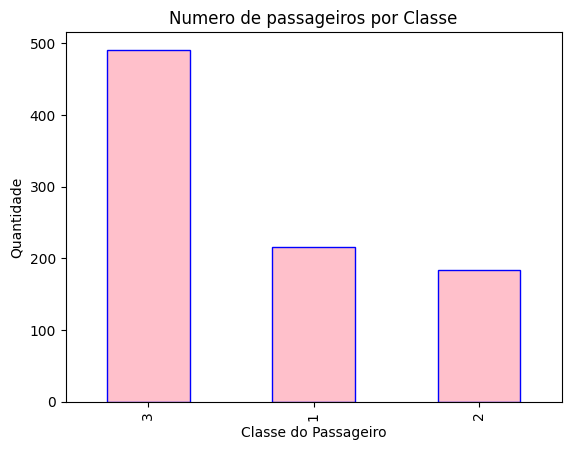

In [29]:
contagem_passageiros = df['Classe'].value_counts()

#criacao grafico
contagem_passageiros.plot(kind='bar', edgecolor='blue', color='pink')

plt.xlabel('Classe do Passageiro')
plt.ylabel('Quantidade')
plt.title('Numero de passageiros por Classe')

plt.show()


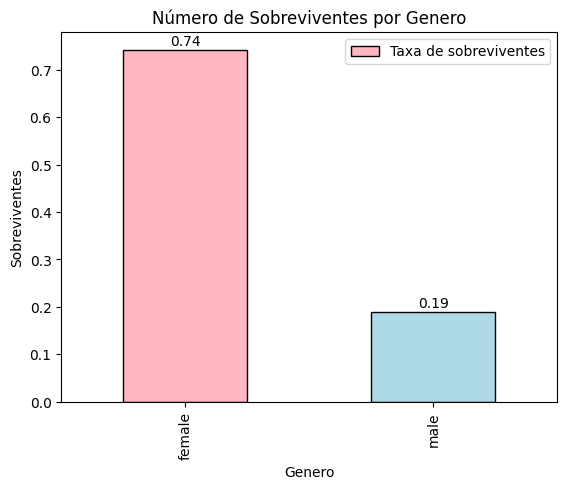

In [32]:
taxa_sob_genero = df.groupby('Genero')['Sobreviveu'].mean()

#cores
cores = ['lightpink', 'lightblue']

#plotagem
barras = taxa_sob_genero.plot.bar(edgecolor = 'black', color = cores)



plt.xlabel('Genero') 
plt.ylabel('Sobreviventes') 
plt.title('Número de Sobreviventes por Genero')
plt.legend(['Taxa de sobreviventes'])


# para aparecer um valor em cima da barra
for i, v in enumerate(taxa_sob_genero): # v = sobreviventes
    barras.text(i, v + 0.01, f'{v:.2f}', color = 'black', ha = 'center') # {v:.2f} = vai arredondar esses números em 2 casas decimais

plt.show()


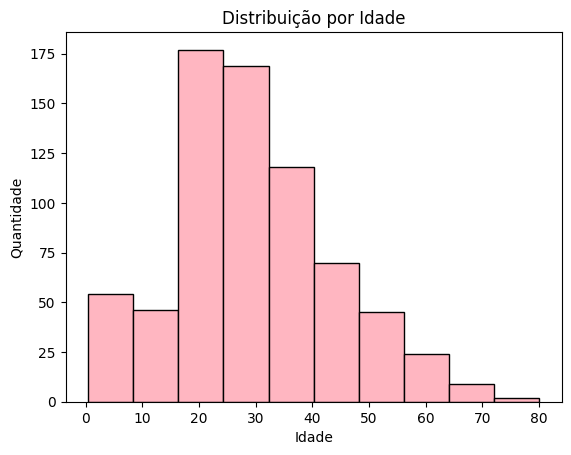

In [36]:
#Distribuição de Idades
df["Idade"].plot.hist(bins= 10, edgecolor="black", color="lightpink")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição por Idade")

plt.show()


## Teste de hipótese
Teste de Classe e SobrevivênciaHipótese Nula H0: Os sobreviventes não dependem da classe dos passageiros \
Hipótese Alternativa H1: Os sobreviventes dependem da classe


In [51]:
from scipy.stats import ttest_ind
import seaborn as sns

Teste T de idade
Estatistica T: -2.06668694625381
Valor P: 0.03912465401348249


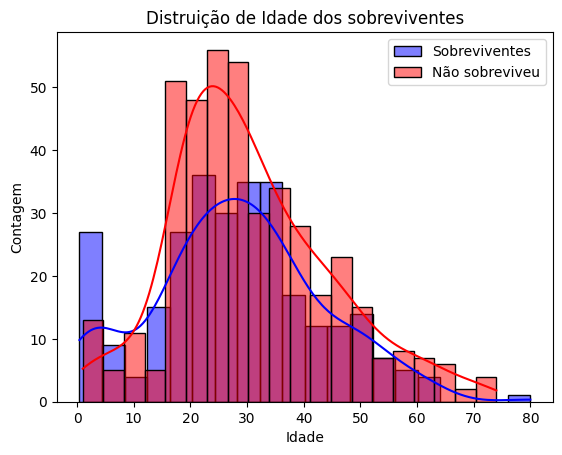

Rejeitamos a hipotese nula


In [53]:
#amostras
idade_sobreviventes = df[df['Sobreviveu']==1]['Idade'].dropna()
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()

#Teste t
estatistica_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviveu)

print('Teste T de idade')
print(f'Estatistica T: {estatistica_t}')
print(f'Valor P: {valor_p}')

#grafico
sns.histplot(idade_sobreviventes, color= 'blue', label='Sobreviventes',kde=True, bins=20)
sns.histplot(idade_nao_sobreviveu, color = 'red', label='Não sobreviveu',kde=True, bins= 20)

#rotulos
plt.legend()
plt.title('Distruição de Idade dos sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

#interpretação
if valor_p < 0.05:
    print('Rejeitamos a hipotese nula')
else:
    print('Não rejeitamos a hipotese nula')



In [55]:
baby_df = df.sample(100)


In [57]:
baby_df.head(3)

,idPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


In [58]:
baby_df.shape

(3, 10)

In [59]:
import sqlite3

In [61]:
#conexao

conn = sqlite3.connect(':memory:')

#escrever o df em  uma tabela SQL
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace') 

#executar a consulta 
query_sql = """
SELECT Genero, COUNT (IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Genero; 
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)

#fechar a conexao
conn.close()

   Genero  Contagem
0  female         2
1    male         1


In [63]:
#pandas
contagem_por_genero = baby_df['Genero'].value_counts().reset_index()
contagem_por_gen.columns = ['Genero', 'Contagem']
print(contagem_por_genero)

   Genero  count
0  female      2
1    male      1
